# Sign language Classification
## 1) Understand Data
## 2) Preprocess Data
## 3) Build Model
## 4) Train Model
## 5) Evaluate Model 
## 6) Predict Sentiment on Unseen Data


In [4]:
from matplotlib import pyplot as plt
# from matplotlib.image import imread
import os
import pandas as pd
import PIL
import numpy as np
import cv2

from PIL import Image

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing import image # img_to_array
import seaborn as sns


#from tensorflow.python.keras import backend as k
from sklearn.metrics import confusion_matrix
import itertools


from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import  Input, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


In [5]:
sample_path = "Sign-Language-Digits-Dataset-master/Examples"
data_dir = "Sign-Language-Digits-Dataset-master/Dataset"
categories= ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9" ] 
num_samples = 10
grayscale_images = True
img_size = 64
num_categories = len(categories)


In [6]:
config = {
  "seed": 1234,
  "num_categories":10,
  "categories": ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9" ],
  "sample_path": "Sign-Language-Digits-Dataset-master/Examples",
  "data_dir": "Sign-Language-Digits-Dataset-master/Dataset",
  "shuffle": True,
  "train_size": 0.7,
  "val_size": 0.15,
  "test_size": 0.15,
  "img_size":64,
  "save_dir": "experiments",
  "num_epochs": 5,
  "early_stopping_criteria": 5,
  "learning_rate": 1e-3,
  "batch_size": 128,
  "fc": {
    "hidden_dim": 100,
    "dropout_p": 0.1
  }
}

set seed to reproduce experiments

In [11]:
np.random.seed(config["seed"])

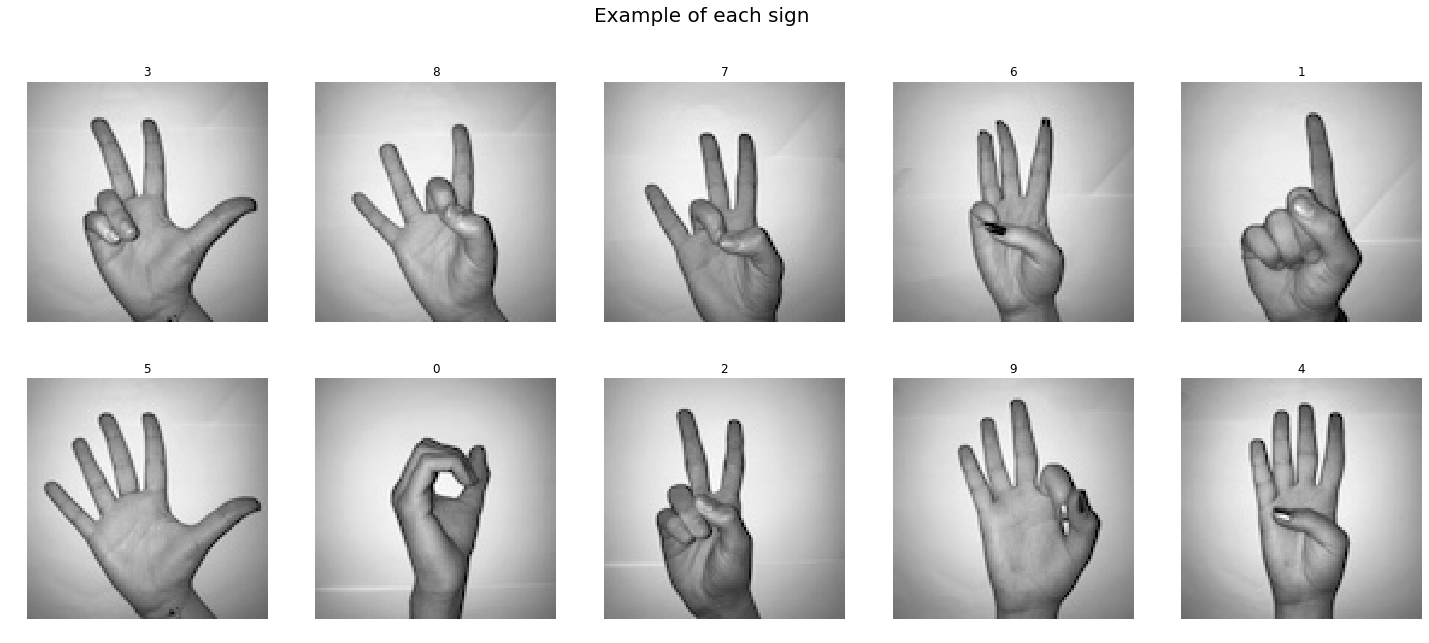

In [5]:
plt.figure(figsize=(25,10))
plt.suptitle("Example of each sign", fontsize=20)
for i, img in enumerate(os.listdir(sample_path)):
        
        img_array = cv2.imread(os.path.join(sample_path,img), cv2.IMREAD_GRAYSCALE) 
        #
        plt.subplot(2, num_samples/2, i+1)
        plt.title(img[-5])
        plt.imshow(img_array, cmap="gray")  
        plt.axis("off")
        
        #plt.show()

In [12]:

def img_to_array(path):
    """Conver image file to NumPy array.  , 1 if grayscale_images else 3
    """
    img_array = cv2.imread(path, cv2.IMREAD_GRAYSCALE if grayscale_images else cv2.IMREAD_COLOR).astype('float32')
    array = cv2.resize(img_array, (img_size, img_size))
    return array
    

In [13]:

def load_data(data_dir, categories):
    """Load data into Pandas DataFrame.
    """
    # Load data from files
    data = []
    

    for category in categories:  
        for file in os.listdir(os.path.join(data_dir,category) ):  
            if file.lower().endswith((".png", ".jpg", ".jpeg")):
                    full_filepath = os.path.join(data_dir, category, file)
                    data.append({"image": img_to_array(full_filepath), "category": int(category)})  
    
    df = pd.DataFrame(data)
    print (df.head())
    return df
'''
ISSUE:
filling or append list is faster than appending dataframe?
'''

'\nISSUE:\nfilling or append list is faster than appending dataframe?\n'

In [14]:
dataset= load_data(data_dir, categories)

   category                                              image
0         0  [[105.0459, 108.206055, 110.96875, 113.5, 115....
1         0  [[131.6084, 136.8125, 140.09375, 142.25, 145.1...
2         0  [[140.84375, 143.25, 146.375, 149.5, 153.09375...
3         0  [[135.6416, 138.4873, 143.24023, 147.21875, 15...
4         0  [[121.5625, 123.125, 124.96875, 127.5, 129.961...


In [23]:
dataset.iloc[0, 1].shape

(64, 64)

In [24]:
dataset.to_csv('image_data.csv', index=None, sep=',', encoding='utf-8')

In [25]:
dataset

,category,image
0,0,"[[105.0459, 108.206055, 110.96875, 113.5, 115...."
1,0,"[[131.6084, 136.8125, 140.09375, 142.25, 145.1..."
2,0,"[[140.84375, 143.25, 146.375, 149.5, 153.09375..."
3,0,"[[135.6416, 138.4873, 143.24023, 147.21875, 15..."
4,0,"[[121.5625, 123.125, 124.96875, 127.5, 129.961..."
5,0,"[[105.5625, 107.96875, 109.6875, 111.25, 113.8..."
6,0,"[[114.31641, 116.575195, 119.52051, 121.94629,..."
7,0,"[[120.0459, 123.8125, 126.52051, 128.25, 130.8..."
8,0,"[[166.6748, 168.0127, 168.0, 168.96875, 170.86..."
9,0,"[[125.125, 128.3623, 131.5, 134.52246, 138.156..."


In [28]:
X = dataset[dataset.columns[1]].values
y = dataset[dataset.columns[0]].values

In [29]:
sample_per_class=np.unique(y, return_counts=True)
 
for sign, number_of_sample in zip(sample_per_class[0], sample_per_class[1]):
    print("{} sign has {} samples.".format(sign, number_of_sample))
'''
data_class = []
for category in categories:
     data_class.append({"category": category, "count": len(os.listdir(os.path.join(data_dir,category)))})
    
'''

0 sign has 205 samples.
1 sign has 206 samples.
2 sign has 206 samples.
3 sign has 206 samples.
4 sign has 207 samples.
5 sign has 207 samples.
6 sign has 207 samples.
7 sign has 206 samples.
8 sign has 208 samples.
9 sign has 204 samples.


'\ndata_class = []\nfor category in categories:\n     data_class.append({"category": category, "count": len(os.listdir(os.path.join(data_dir,category)))})\n    \n'

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=config["test_size"], random_state=config["seed"])

Text(0.5, 1.0, 'Number of images per classes')

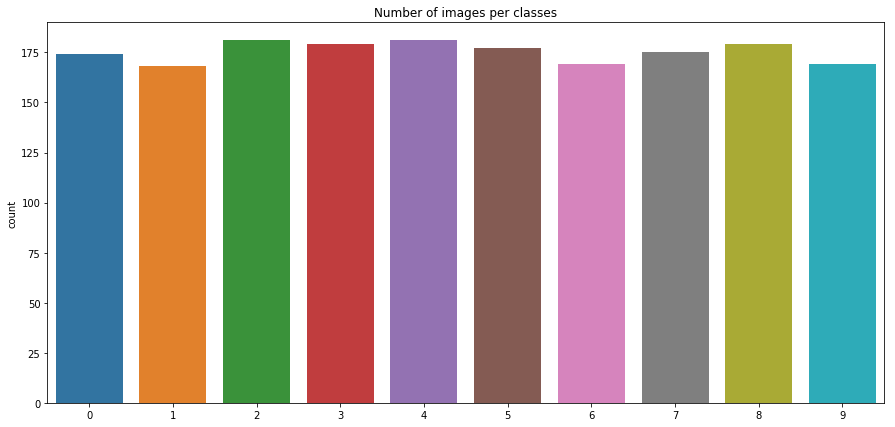

In [32]:
plt.figure(figsize=(15,7))#, palette="icefire"
g = sns.countplot(y_train)
plt.title("Number of images per classes")

In [33]:
y_train = to_categorical(y_train, config["num_categories"])
y_test = to_categorical(y_test, config["num_categories"])

In [34]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [35]:
# build our CNN
model = Sequential()

# Convolutional Blocks: (1) Convolution, (2) Activation, (3) Pooling
model.add(Conv2D(input_shape=(64, 64, 1), filters=64, kernel_size=(4,4), strides=(2)))
model.add(Activation('relu'))
#outputs a (20, 20, 32) matrix
model.add(Conv2D(filters=64, kernel_size=(4,4), strides=(1)))
model.add(Activation('relu'))
#outputs a (8, 8, 32) matrix
model.add(MaxPooling2D(pool_size=4))

# dropout helps with over fitting by randomly dropping nodes each epoch
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [55]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [63]:
# Compile the model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])


In [66]:
epochs = 80 # for better result increase the epochs
batch_size = 250

In [29]:
X_train = np.array([img for img in X_train])

In [ ]:
 7ms/step - loss: 0.0310 - acc: 0.9953 - val_loss: 0.9987 - val_acc: 0.9240

In [30]:
X_train.shape

(1752, 64, 64)

In [31]:
X_train = np.expand_dims(X_train, 3)

In [40]:
X_test = np.array([img for img in X_test])
X_test = np.expand_dims(X_test, 3)

In [67]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs = epochs,  validation_split=0.15)


Train on 1489 samples, validate on 263 samples
Epoch 1/80
1489/1489 [==============================] - 10s 6ms/step - loss: 0.0085 - acc: 0.9993 - val_loss: 0.3099 - val_acc: 0.9430
Epoch 2/80
1489/1489 [==============================] - 9s 6ms/step - loss: 0.0085 - acc: 0.9993 - val_loss: 0.2876 - val_acc: 0.9392
Epoch 3/80
1489/1489 [==============================] - 9s 6ms/step - loss: 0.0084 - acc: 0.9993 - val_loss: 0.2879 - val_acc: 0.9392
Epoch 4/80
1489/1489 [==============================] - 9s 6ms/step - loss: 0.0054 - acc: 1.0000 - val_loss: 0.2630 - val_acc: 0.9430
Epoch 5/80
1489/1489 [==============================] - 9s 6ms/step - loss: 0.0073 - acc: 0.9993 - val_loss: 0.2514 - val_acc: 0.9430
Epoch 6/80
1489/1489 [==============================] - 9s 6ms/step - loss: 0.0069 - acc: 0.9993 - val_loss: 0.2346 - val_acc: 0.9316
Epoch 7/80
1489/1489 [==============================] - 9s 6ms/step - loss: 0.0057 - acc: 1.0000 - val_loss: 0.2401 - val_acc: 0.9506
Epoch 8/80
148

In [51]:
history.history

{'val_loss': [1.7133957460352676,
  1.6753940672928842,
  1.636853932427816,
  1.5981383618293152,
  1.5368763140399193,
  1.521210920221452,
  1.5032474885875282,
  1.461997304579151,
  1.4300238832321457,
  1.39026943177778,
  1.3591368388767024,
  1.3426179137973278,
  1.2719302113971782,
  1.2383559103701052,
  1.1779166142750148,
  1.162927005680795,
  1.1442593612598375,
  1.10627264622953,
  1.0365506687091783,
  0.9987175092950973],
 'val_acc': [0.8441064629717925,
  0.8326995957486983,
  0.8745247189083026,
  0.9087452559870005,
  0.8783270079826674,
  0.8821292970570321,
  0.91634983413573,
  0.8745247189083026,
  0.9087452559870005,
  0.9049429589804587,
  0.9087452480548235,
  0.9315589258426042,
  0.9315589258426042,
  0.9277566367682395,
  0.9315589258426042,
  0.9391635039913337,
  0.935361214916969,
  0.935361214916969,
  0.9201521152779176,
  0.9239543476938749],
 'loss': [0.2625866291345247,
  0.23085503868603563,
  0.2004837422482194,
  0.17543387772294,
  0.16158215